<a href="https://colab.research.google.com/github/wojr21/courses/blob/main/data_visualization/07_seaborn_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Churn Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Wstępne przetworzenie danych

In [5]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
19.65      8
20.05      8
          ..
239.55     1
169.65     1
6273.4     1
4652.4     1
4445.3     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df['TotalCharges'].sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
TotalChargesMedian = df[df['TotalCharges'] != ' ']['TotalCharges'].astype('float32').median()
TotalChargesMedian

1397.47509765625

In [14]:
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian
df['TotalCharges'] = df['TotalCharges'].astype('float32')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['TotalCharges'].value_counts()

1397.475098    11
20.200001      11
19.750000       9
19.650000       8
20.049999       8
               ..
1588.750000     1
1451.599976     1
1173.349976     1
5589.450195     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
if not df.isnull().sum().sum():
  print('Nie ma braków.')

Nie ma braków.


In [21]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod', 'Churn']

numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in categorical:
  df[col] = pd.Categorical(df[col])

for col in numerical:
  df[col] = df[col].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [22]:
df = df.drop(columns = ['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371147,24.559708,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.0,64.761826,30.089973,18.250000,35.500000,70.349998,89.849998,118.750000
TotalCharges,7043.0,2281.915039,2265.270752,18.799999,402.225006,1397.475098,3786.599976,8684.799805


In [25]:
df.describe(include = ['category']).T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### Rozkład Churn

No     5174
Yes    1869
Name: Churn, dtype: int64


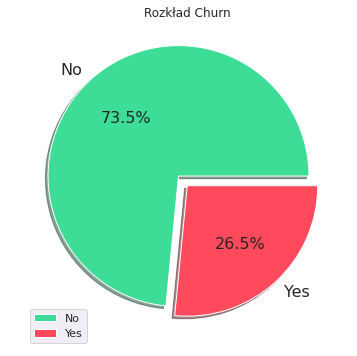

In [30]:
plt.figure(figsize = (8, 6))
sns.set()
df['Churn'].value_counts().plot(kind = 'pie',
                                fontsize = 16,
                                colors = ['#3DDC97', '#FF495C'],
                                explode = [0.1, 0],
                                shadow = True,
                                autopct = '%1.1f%%')
plt.legend()
plt.ylabel(' ')
plt.title('Rozkład Churn')
print(df['Churn'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


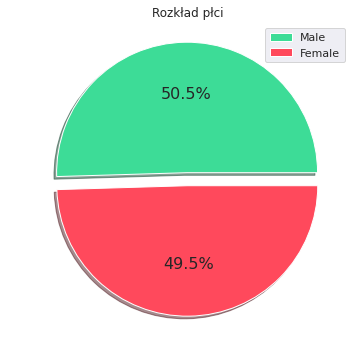

In [34]:
plt.figure(figsize = (8, 6))
df['gender'].value_counts().plot(kind = 'pie',
                                fontsize = 16,
                                labels = ['', ''],
                                colors = ['#3DDC97', '#FF495C'],
                                explode = [0.1, 0],
                                shadow = True,
                                autopct = '%1.1f%%')
plt.legend(['Male', 'Female'])
plt.ylabel(' ')
plt.title('Rozkład płci')
print(df['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


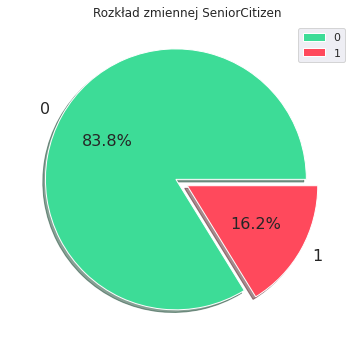

In [35]:
plt.figure(figsize = (8, 6))
df['SeniorCitizen'].value_counts().plot(kind = 'pie',
                                fontsize = 16,
                                colors = ['#3DDC97', '#FF495C'],
                                explode = [0.1, 0],
                                shadow = True,
                                autopct = '%1.1f%%')
plt.legend()
plt.ylabel(' ')
plt.title('Rozkład zmiennej SeniorCitizen')
print(df['SeniorCitizen'].value_counts())

### Rozkłady zmiennych numercznych

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


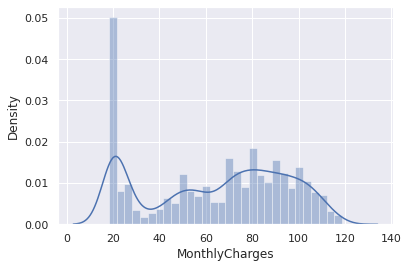

In [49]:
sns.distplot(df['MonthlyCharges'], bins = 30)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


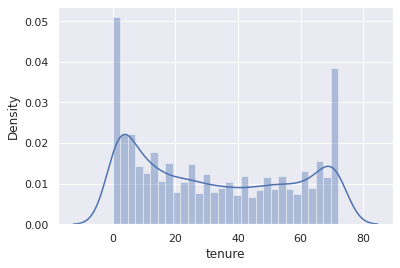

In [45]:
sns.distplot(df['tenure'], bins = 30)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


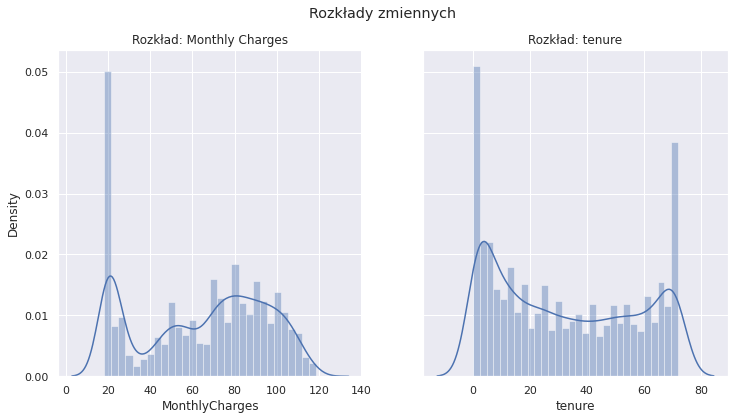

In [55]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (12, 6))
sns.distplot(df['MonthlyCharges'], bins = 30, ax = ax[0])
sns.distplot(df['tenure'], bins = 30, ax = ax[1])

fig.suptitle('Rozkłady zmiennych')
ax[0].title.set_text('Rozkład: Monthly Charges')
ax[1].title.set_text('Rozkład: tenure')

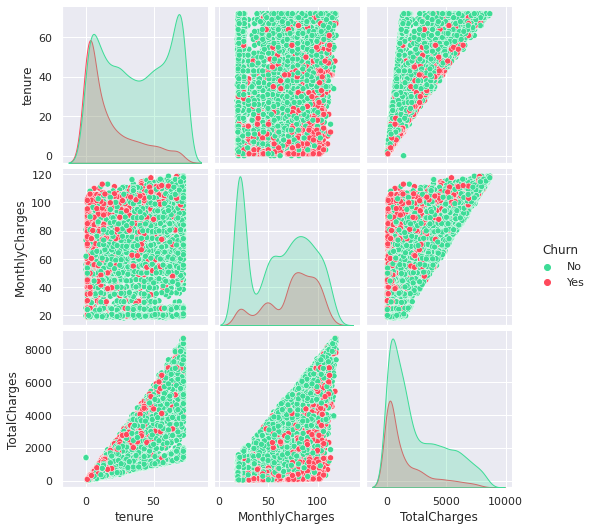

In [59]:
sns.pairplot(data = df, vars = ['tenure', 'MonthlyCharges', 'TotalCharges'],
             hue = 'Churn', palette = ['#3DDC97', '#FF495C'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


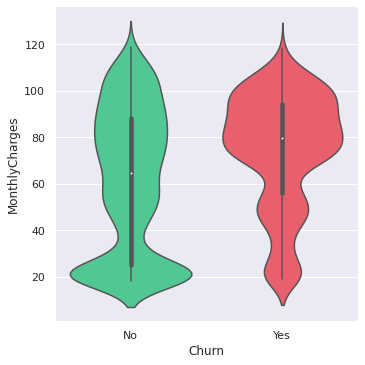

In [73]:
sns.catplot(data = df, x = 'Churn', y = 'MonthlyCharges',
            kind = 'violin', palette = ['#3DDC97', '#FF495C'], ax = ax1)

### Macierz Korelacji

In [74]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


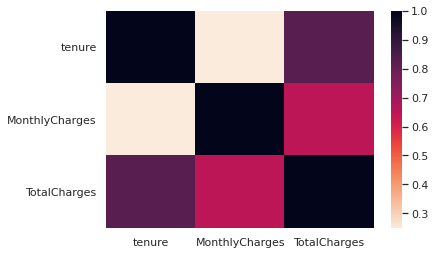

In [89]:
sns.heatmap(df.corr(), cmap = 'rocket_r')